# REASON

With a Convolutional Neural Network techique, we are going to find out if we can predict pieces of clothes by images.

# IMPORTING LIBRARIES AND DATASET STORED ON TENSORSLOW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

Watching the photo number 25 

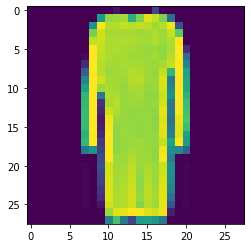

In [5]:
plt.imshow(x_train[25])

# FORMATING THE VALUES

Machines works better with low numbers so let make them slower but keeping the difference between.

In [6]:
x_train.max()

255

In [7]:
x_train = x_train/255
x_test = x_test/255

And then we need to change their shape due to needs of the DL model.

In [8]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# PRE PROCESSING

Before to start we need to change the values of our dataset, we can do this by using categorical values.

The to_categorical function takes a vector of class labels as input, and returns a matrix where each row corresponds to a sample, and each column corresponds to a class. The matrix is filled with binary values, where a value of 1 indicates that the corresponding sample belongs to the corresponding class, and a value of 0 indicates that it does not.

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

# CREATING THE MODEL

For this model we will use three hidden layers with Rectified Linear Unit and the softmax. ReLU is used to introduce non-linearity into the output of a neural network, while softmax is used in the output layer of a neural network for multi-class classification tasks.

We also need to use the Flatten feature. Flattening is a process of converting a multidimensional array, such as an image or a feature map, into a one-dimensional array. This operation is commonly used in deep learning neural networks to transform the input data into a form that can be fed into the fully connected layers of the network.

And at the end, a compile layer with the accuracy metric for evalution propose.

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [12]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape=(28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

# TRAINING THE MODEL

In [14]:
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 67s 35ms/step - loss: 0.3932 - accuracy: 0.8587 - val_loss: 0.3204 - val_accuracy: 0.8796
Epoch 2/3
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2721 - accuracy: 0.9010 - val_loss: 0.2911 - val_accuracy: 0.8915
Epoch 3/3
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2284 - accuracy: 0.9150 - val_loss: 0.2635 - val_accuracy: 0.9050


Now we have the metrics of the model. Let's watch them.

In [15]:
model.metrics_names

['loss', 'accuracy']

In [16]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

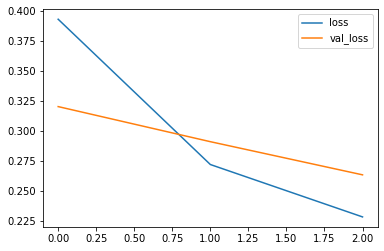

In [17]:
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

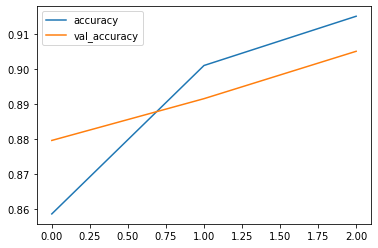

In [18]:
metrics[["accuracy", "val_accuracy"]].plot()

# RESULTS

By creating predicts depending on our test data set and them compare them by the rue values. We got a result of 91% of accuracy. On in another words, the DL model will indentify 9 out of 10, if a clothe is a pant, shirt, coat, ect.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
pre =  model.predict(x_test).argmax(axis=-1)

313/313 [==============================] - 3s 8ms/step


In [26]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.97      0.98      0.98      1000
           2       0.86      0.83      0.85      1000
           3       0.88      0.93      0.90      1000
           4       0.85      0.84      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.70      0.73      1000
           7       0.96      0.95      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.91      0.90     10000

